<a href="https://colab.research.google.com/github/toastooh/project/blob/main/%E3%80%8CPCA%26datasets_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA

We will use some datasets to show the power of PCA.

* iris
* 8x8 mnist

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

## Iris

It is the normal iris dataset.

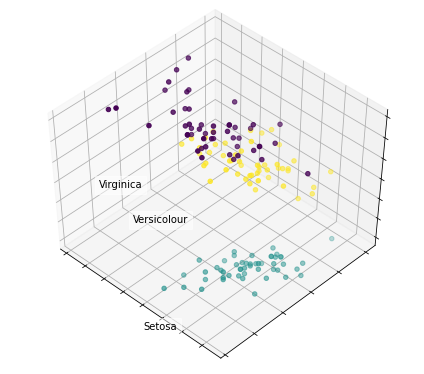

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Let's try PCA to reduce the dimension of iris data. First, we randomly split the iris dataset into two datasets, one for training (70%) and one for testing (30%).

In [3]:
from sklearn.model_selection import train_test_split

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

### Question #1:
Try to use a decision tree to train the traing dataset. How to find the best max_depth of the tree?

In [4]:
from sklearn.tree import DecisionTreeClassifier
# Decision trees with depth = ?
#Based on the below accuracy score, the best max_depth is 3

In [11]:
import pandas as pd
from sklearn.metrics import accuracy_score
max_depth=[]
accu=[]
dic={
    'Max Depth': max_depth,
     'Accuracy': accu
}
for i in range(1,6):
  model=DecisionTreeClassifier(max_depth=i)
  max_depth.append(i)
  model.fit(X_train,y_train)
  accu.append(model.score(X_test,y_test))
df=pd.DataFrame(dic)
print(df)

   Max Depth  Accuracy
0          1  0.666667
1          2  0.888889
2          3  0.933333
3          4  0.911111
4          5  0.911111


### Question #2:

Predict the testing data. What is your accuracy_score?

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accu=accuracy_score(y_test,y_pred)

print('Accuracy:',accu )

Accuracy: 0.9333333333333333


### Question #3:

Try to use PCA to reduce the dimensionality to 2. Use the entire iris dataset. (DO NOT use training/testing data.) Plot 2-d figure with PCA data and their labels.

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

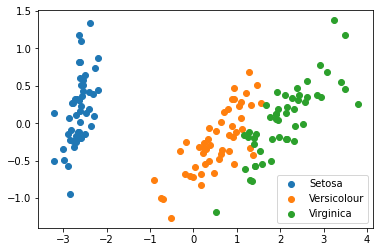

In [14]:
# Plotting the results of PCA
fig , ax = plt.subplots()
plt.scatter(X_pca[y==0,0],X_pca[y==0,1],label='Setosa')
plt.scatter(X_pca[y==1,0],X_pca[y==1,1],label='Versicolour')
plt.scatter(X_pca[y==2,0],X_pca[y==2,1],label='Virginica')

leg = ax.legend(loc='lower right', shadow=False)
plt.show()

### Question #4:

Now, split the PCA data into two datasets (training 70%, testing 30%) and build a decision tree. What is the result? 

In [15]:
# Test-train split and apply PCA

model=DecisionTreeClassifier(max_depth=3)
pca_x_train,pca_x_test,pca_y_train,pca_y_test= train_test_split(X_pca,y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)
model.fit(pca_x_train,pca_y_train)
pca_y_pred=model.predict(pca_x_test)
ac=accuracy_score(pca_y_test,pca_y_pred)
print('Accuracy: ',ac )

Accuracy:  0.9111111111111111


### Question #5:

Is the accuracy higher? Why? Please give us a reasonable explaination.  
No. The dimension of the original data is small and all components are important to be considered during the learining processs, so the reduction of dimension on this data doesn't make accuracy higher.

### Question #6:

How do you even get a higher accuracy rate? It is an open question, and try your best.

A: I get a higher accuracy rate by using MinMaxScaler to preprocess the input data.

Hint: PCA parameters, data preprocessing and feature engineering.

In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
# Train, test splits

X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)
mmodel=DecisionTreeClassifier(max_depth=3)
mmodel.fit(X_train_minmax,y_train)
nor_y_pred=mmodel.predict(X_test_minmax)
tt=accuracy_score(y_test,nor_y_pred)
print('Accuracy:',tt)

Accuracy: 0.9333333333333333


## MNIST

Let's look at a famous handwritten numbers dataset.

In [18]:
digits = datasets.load_digits()
digi_X = digits.data
digi_y = digits.target

In [19]:
digi_y

array([0, 1, 2, ..., 8, 9, 8])

Each data sample has 64 features that represent a 8*8 grid. Each feature is a real number (0.0, 1.0), while 1 is white and 0 is black. Here are some examples.

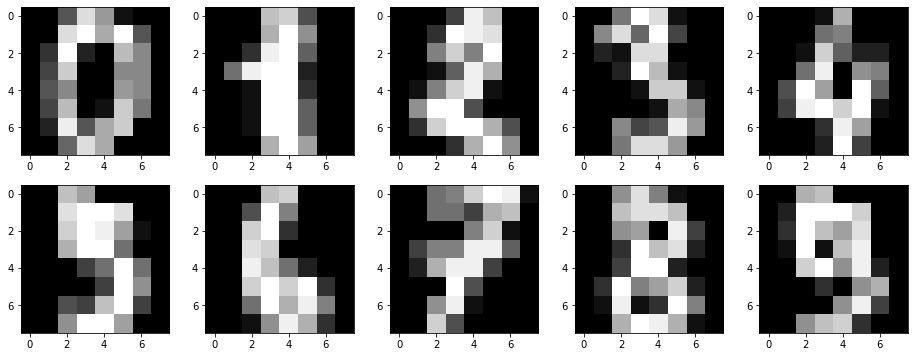

In [20]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digi_X[i,:].reshape([8,8]), cmap='gray');

### Question #7:

Try to use PCA to reduce the MNIST data to 2-dimension, and plot the 2-d figure with labels.

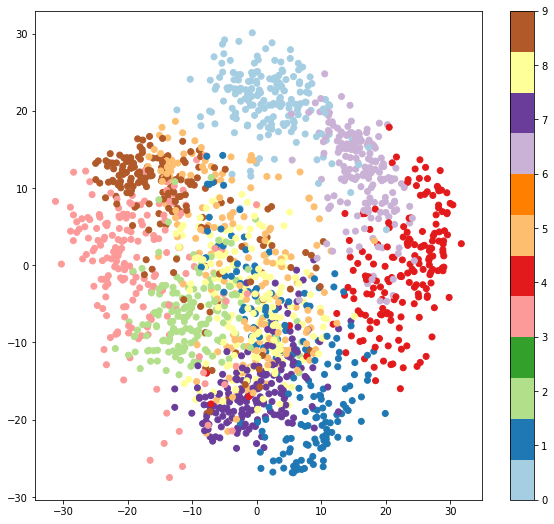

In [21]:
# Try plt.scatter and 'c' parameter
# Try plt.colorbar()
pca = decomposition.PCA(n_components=2)
pca.fit(digi_X)
digi_X_pca = pca.transform(digi_X)
plt.figure(figsize=(10, 9))
plt.scatter(digi_X_pca[:,0],digi_X_pca[:,1],c=digi_y,cmap='Paired')

plt.colorbar()
plt.show()

### Question #8:

Why the figure looks bad? How many components would be better?


---

A: It looks bad due to the fact that both of the explained variance ratio of the first 2 component are low which makes our two-dimensional projection lose a lot of information. I think 20 to 30 components to retain 90% of variance would be better.

In [ ]:
# hint: take a look at pca.explained_variance_ratio_

In [22]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

### Bonus #1:

Try another technique for dimension reduction named "TSNE". Take a look at TSNE's document. Could you explain why TSNE is better?

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE

## Hierarchical Clustering

Here is an example of Hierarchical Clustering.

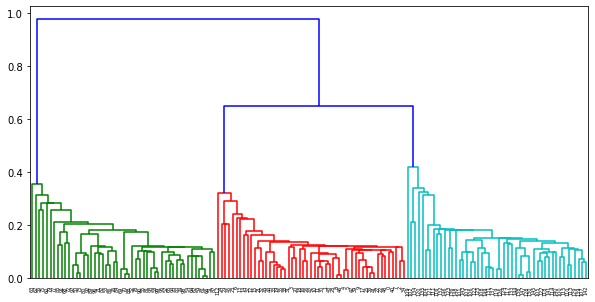

In [24]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

h_X = np.zeros((150, 2))

np.random.seed(seed=42)
h_X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
h_X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

h_X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
h_X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

h_X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
h_X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(h_X) # pdist calculates the uxpper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

#### Question #9:

Try to cluster iris data using the above codes. Show misclustered data points.

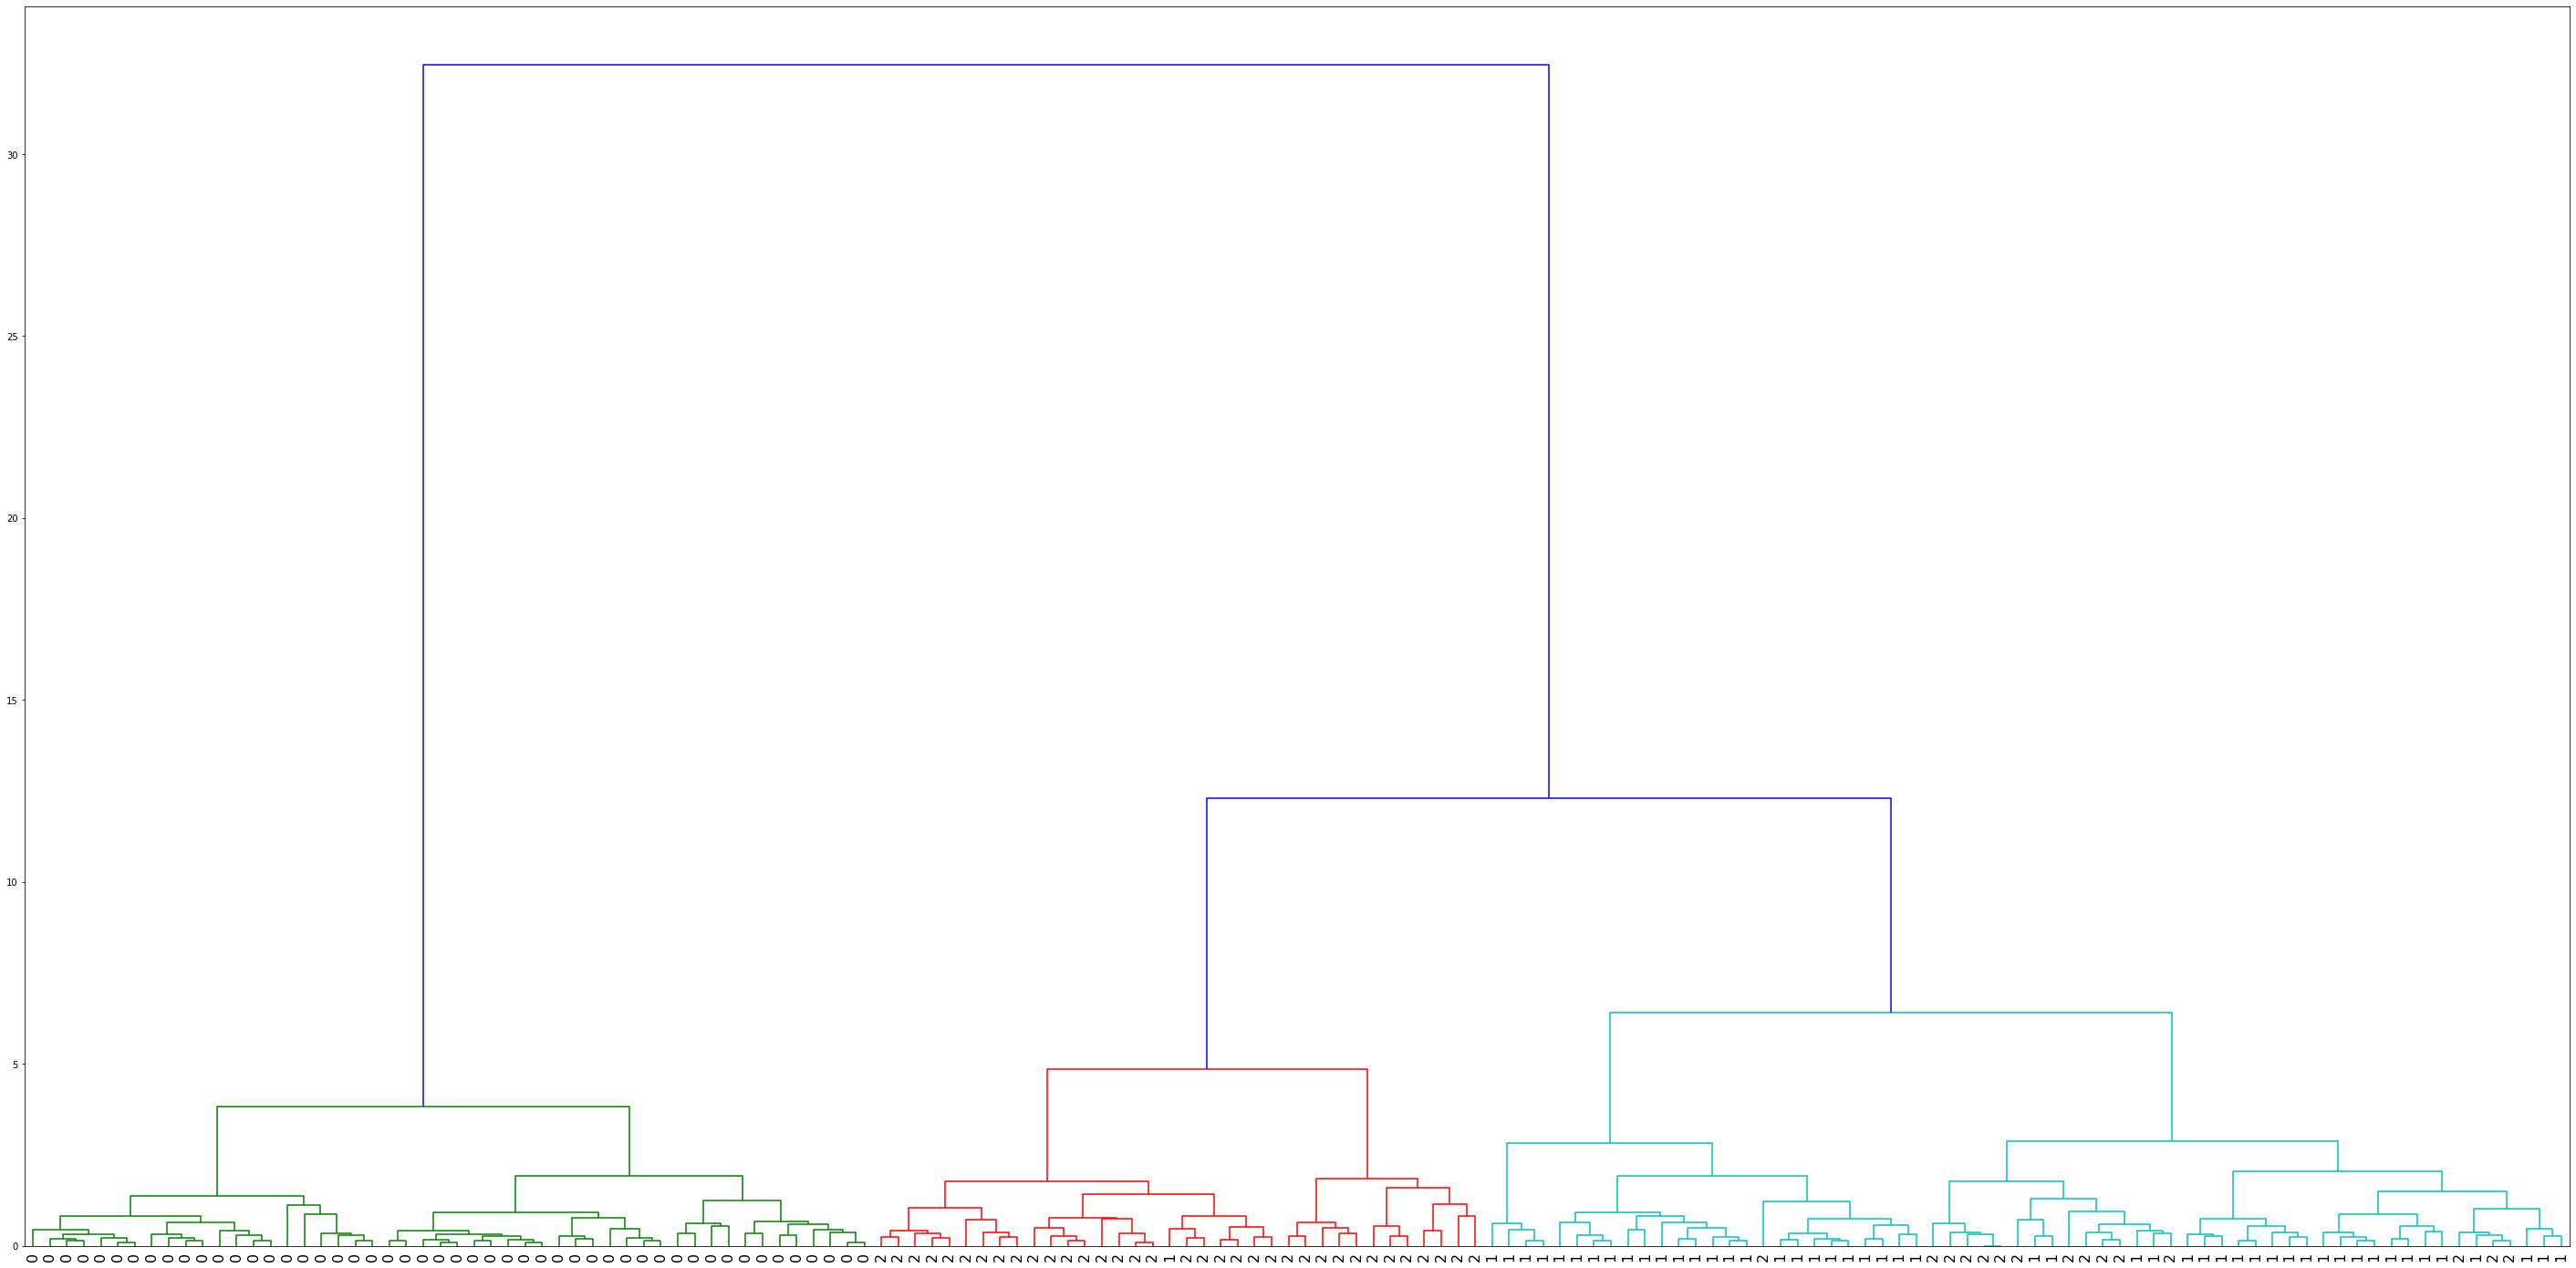

In [25]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X=iris.data

distance_mat_X = pdist(X)
Z_X = hierarchy.linkage(distance_mat_X, metric='euclidean',method='ward') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(50, 25))

dn = hierarchy.dendrogram(Z_X, color_threshold=8,leaf_font_size=16,labels=y)

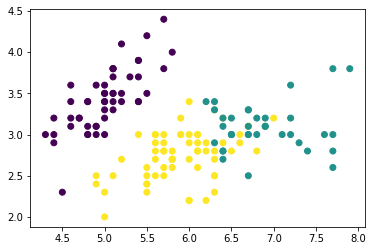

In [26]:
#Based on the below 2-D scatter plot and 3-D one,I found some of the yellow-cluster data point and blue-clutser one are misclustered.
#We also can verify the fact by the above hierachical cluster by setting labels as target value. 
clusters=hierarchy.fcluster(Z_X,8,criterion='distance')
plt.scatter(X[:,0],X[:,1],c=clusters)

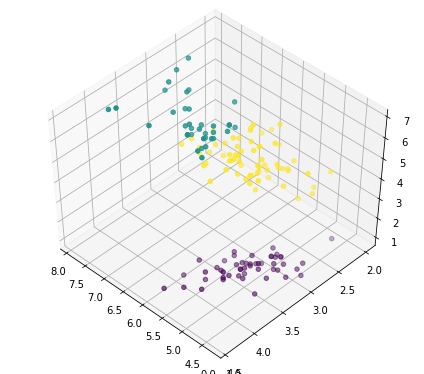

In [27]:
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=clusters)
plt.show()